<a href="https://colab.research.google.com/github/mayankdotasm/SearchAlgorithmsVlab/blob/main/Practical_Assignmnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

## Imporing dataset and pre processing

In [2]:
# Fetch data
from ucimlrepo import fetch_ucirepo
waveform_database_generator_version_1 = fetch_ucirepo(id=107)

# Extract data
X = waveform_database_generator_version_1.data.features
y = waveform_database_generator_version_1.data.targets
name = "waveform_database_generator_version_1"

In [3]:
import pandas as pd
import numpy as np
df = pd.concat([X, y], axis=1)

In [4]:
y.columns

Index(['class'], dtype='object')

In [5]:
num_null_values = df.isnull().sum().sum()  # Total number of null values
num_classes = df['class'].nunique() if 'class' in df.columns else "Unknown"  # Number of classes based on 'target' column

# Drop rows with null values
df = df.dropna()

print(f"Dataset: {name}")
print(f"Number of rows: {df.shape[0]} (after dropping nulls)")
print(f"Number of columns: {df.shape[1]}")
print(f"Number of classes: {num_classes}")
print(f"Number of null values: {df.isnull().sum().sum()} (after cleaning)")
print('-' * 30)


Dataset: waveform_database_generator_version_1
Number of rows: 5000 (after dropping nulls)
Number of columns: 22
Number of classes: 3
Number of null values: 0 (after cleaning)
------------------------------


# 1. Use the Decision Tree classification algorithm to construct a classifier on two datasets. Evaluate the classifier's performance by dividing the dataset into a training set (75%) and a test set (25%). Compare the performance with that of:
- Bagging ensemble consisting of 3,5,7,9 Decision tree classifiers
- Adaboost ensemble consisting of 3,5,7,9 Decision tree classifiers

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) # 70-20 split; 30 test size

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
results = []
def evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([model_name, accuracy, precision, recall, f1])

In [9]:
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, 'Decision Tree')

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Bagging with different numbers of estimators
for n_estimators in [3, 5, 7, 9]:
    bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42)
    evaluate_model(bagging, f'Bagging (n={n_estimators})')

In [12]:
# AdaBoost with different numbers of estimators
for n_estimators in [3, 5, 7, 9]:
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42)
    evaluate_model(adaboost, f'AdaBoost (n={n_estimators})')

In [13]:

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.764000,0.763838,0.764000,0.763813
1,Bagging (n=3),0.788000,0.788002,0.788000,0.787902
2,Bagging (n=5),0.801333,0.801206,0.801333,0.801158
3,Bagging (n=7),0.816667,0.816559,0.816667,0.816466
4,Bagging (n=9),0.824000,0.823862,0.824000,0.823795
5,AdaBoost (n=3),0.772000,0.771833,0.772000,0.771887
6,AdaBoost (n=5),0.772000,0.771833,0.772000,0.771887
7,AdaBoost (n=7),0.772000,0.771833,0.772000,0.771887
8,AdaBoost (n=9),0.772000,0.771833,0.772000,0.771887


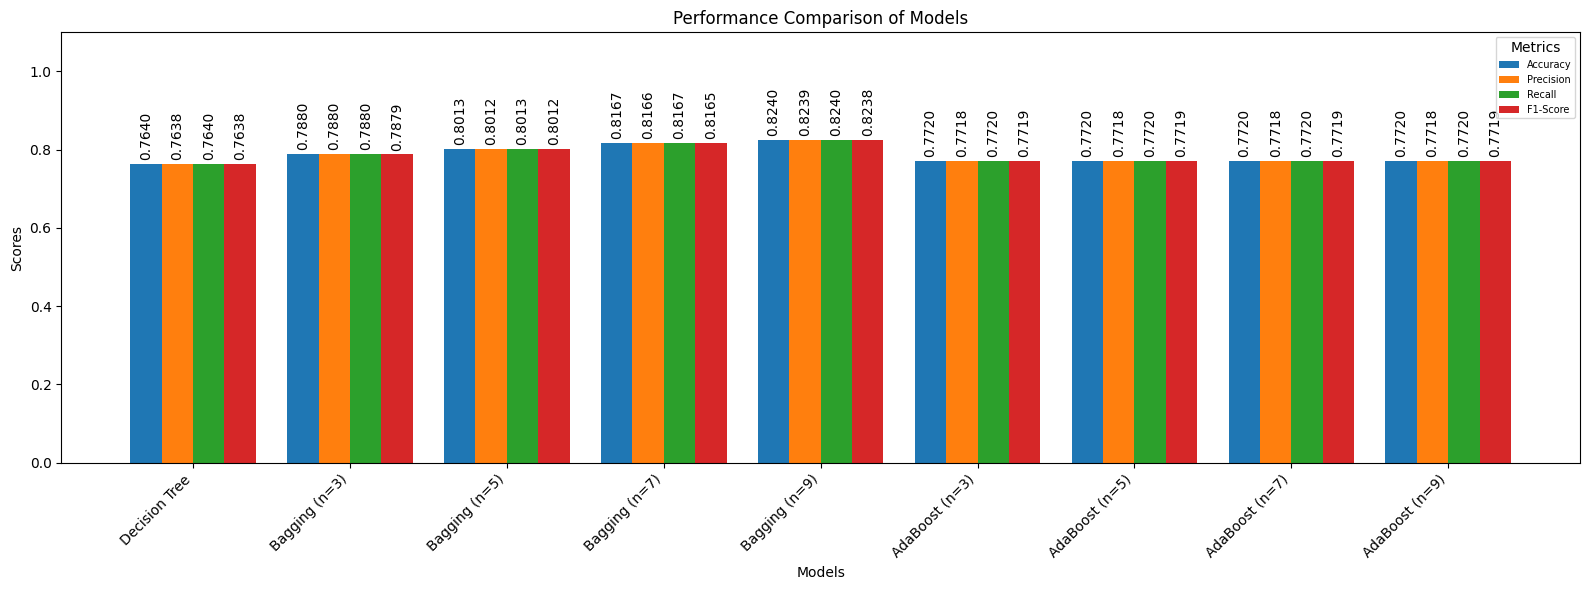

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and metrics
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Set the figure size
plt.figure(figsize=(16, 6))

# Set width for the bars
bar_width = 0.2  # Reduced bar width for better spacing

# Define the position of the bars on the x-axis
x_pos = np.arange(len(models))

# Loop through each metric and create a set of bars for each
for i, metric in enumerate(metrics):
    # Get the values for the current metric
    values = results_df[metric].values

    # Create a bar plot for each metric
    bars = plt.bar(x_pos + i * bar_width, values, width=bar_width, label=metric)

    # Annotate each bar with its value (vertically)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.01, f'{yval:.4f}',
                 ha='center', va='bottom', rotation=90)

# Set the y-axis limits from 0 to 1
plt.ylim(0, 1.1)

# Add labels, title, and customize the plot
plt.xticks(x_pos + bar_width * (len(metrics) - 1) / 2, models, rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison of Models')
plt.legend(title='Metrics', fontsize=7)

# Display the plot
plt.tight_layout()
plt.show()


# 2. For any 10 datasets (from table 6.5) compare accuracy, precision, Recall and  Fmeasure of Decision tree, Bagging and Boosting, Random Forest. Clearly mention the parameters values used for each case and show results in a tabular form

## Importing Datasets and Preprocessing

In [15]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

def load_dataset_all(name):
    dataset_ids = {
        'australia': 143, #
        'sonar': 151, #
        'zoo': 111, #
        'breast': 15, #
        'waveform': 107, #
        'vehicle': 149, #
        'ionosphere': 52, #
        'auto': 10, #
        'heart': 145, #
        'glass': 42, #
    }

    try:
        if name not in dataset_ids:
            raise ValueError("Unknown dataset")

        # Fetch the dataset using its ID
        dataset = fetch_ucirepo(id=dataset_ids[name])

        # Handle different structures for dataset features and targets
        if hasattr(dataset.data, 'features'):
            X = dataset.data.features
        elif hasattr(dataset.data, 'data'):
            X = dataset.data.data  # Some datasets may have this structure
        else:
            raise RuntimeError(f"Could not find features for dataset {name}")

        if hasattr(dataset.data, 'targets'):
            y = dataset.data.targets
        elif hasattr(dataset, 'target'):
            y = dataset.target  # Some datasets may have targets here
        else:
            raise RuntimeError(f"Could not find target for dataset {name}")


        if 'features' in dataset.variables:
            feature_names = dataset.variables['features']
            df = pd.DataFrame(data=X, columns=feature_names)
        else:
            df = pd.DataFrame(data=X)


        df['target'] = y

        return df  # Return the DataFrame of the dataset

    except Exception as e:
        raise RuntimeError(f"Error loading dataset {name}: {e}")


dataset_names = ['australia',
                 'sonar',
                 'zoo',
                 'breast',
                 'waveform',
                 'vehicle',
                 'ionosphere',
                 'auto',
                 'heart',
                 'glass'
                 ]

datasets = []

for name in dataset_names:
    try:
        datasets.append(load_dataset_all(name))
    except RuntimeError as e:
        print(e)

In [16]:
print(len(datasets))

10


In [17]:
for name, df in zip(dataset_names, datasets):
    print(f"Dataset: {name}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print(f"Number of classes: {len(df['target'].unique())}")
    print(f"Number of null values: {df.isnull().sum().sum()}")
    print('-' * 30)


Dataset: australia
Number of rows: 690
Number of columns: 15
Number of classes: 2
Number of null values: 0
------------------------------
Dataset: sonar
Number of rows: 208
Number of columns: 61
Number of classes: 2
Number of null values: 0
------------------------------
Dataset: zoo
Number of rows: 101
Number of columns: 17
Number of classes: 7
Number of null values: 0
------------------------------
Dataset: breast
Number of rows: 699
Number of columns: 10
Number of classes: 2
Number of null values: 16
------------------------------
Dataset: waveform
Number of rows: 5000
Number of columns: 22
Number of classes: 3
Number of null values: 0
------------------------------
Dataset: vehicle
Number of rows: 846
Number of columns: 19
Number of classes: 5
Number of null values: 1
------------------------------
Dataset: ionosphere
Number of rows: 351
Number of columns: 35
Number of classes: 2
Number of null values: 0
------------------------------
Dataset: auto
Number of rows: 205
Number of col

In [18]:
# Function to count null values, drop null rows, and print dataset info
def clean_and_print_dataset_info(datasets, dataset_names):
    cleaned_datasets = []  # To store cleaned datasets
    for name, df in zip(dataset_names, datasets):
        num_null_values = df.isnull().sum().sum()  # Total number of null values
        num_classes = df['target'].nunique() if 'target' in df.columns else "Unknown"  # Number of classes based on 'target' column

        # Drop rows with null values
        df_cleaned = df.dropna()
        cleaned_datasets.append(df_cleaned)  # Store cleaned dataset

        print(f"Dataset: {name}")
        print(f"Number of rows: {df_cleaned.shape[0]} (after dropping nulls)")
        print(f"Number of columns: {df_cleaned.shape[1]}")
        print(f"Number of classes: {num_classes}")
        print(f"Number of null values: {df_cleaned.isnull().sum().sum()} (after cleaning)")
        print('-' * 30)

    return cleaned_datasets

cleaned_datasets = clean_and_print_dataset_info(datasets, dataset_names)


Dataset: australia
Number of rows: 690 (after dropping nulls)
Number of columns: 15
Number of classes: 2
Number of null values: 0 (after cleaning)
------------------------------
Dataset: sonar
Number of rows: 208 (after dropping nulls)
Number of columns: 61
Number of classes: 2
Number of null values: 0 (after cleaning)
------------------------------
Dataset: zoo
Number of rows: 101 (after dropping nulls)
Number of columns: 17
Number of classes: 7
Number of null values: 0 (after cleaning)
------------------------------
Dataset: breast
Number of rows: 683 (after dropping nulls)
Number of columns: 10
Number of classes: 2
Number of null values: 0 (after cleaning)
------------------------------
Dataset: waveform
Number of rows: 5000 (after dropping nulls)
Number of columns: 22
Number of classes: 3
Number of null values: 0 (after cleaning)
------------------------------
Dataset: vehicle
Number of rows: 845 (after dropping nulls)
Number of columns: 19
Number of classes: 5
Number of null value

## TRAIN MODEL

In [19]:
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(model, model_name,X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return [model_name, accuracy, precision, recall, f1]


def train_and_evaluate_models(i,dataset, n_estimators=80,random_state=42):   #n_estimators=80,random_state=42
  X = dataset.drop('target', axis=1)
  X = X.select_dtypes(include=['number'])
  y = dataset['target']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  #test_size=0.25, random_state=42

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  classifiers = {
      'Random Forest': RandomForestClassifier(),
      'Decision Tree': DecisionTreeClassifier(),
      'bagging' : BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_estimators, random_state=random_state),
      'adaboost' : AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=n_estimators, random_state=random_state)
    }

  results = []
  for name, clf in classifiers.items():
    #print(f"Training {name}...")
    results.append(evaluate_model(clf, name,X_train_scaled, X_test_scaled, y_train, y_test))


  results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
  return results_df

In [20]:
final_result=[]
for i,dataset in enumerate(cleaned_datasets):
  #if i!=2:
  print(f"Dataset: {dataset_names[i]}")
  final_result.append(train_and_evaluate_models(i,dataset)) #n_estimators=80, random_state=42, test_size=0.25

Dataset: australia
Dataset: sonar
Dataset: zoo
Dataset: breast
Dataset: waveform
Dataset: vehicle
Dataset: ionosphere
Dataset: auto
Dataset: heart
Dataset: glass


In [21]:
for i in range(len(final_result)):
  print(f"Dataset: {dataset_names[i]}")
  print(final_result[i])

Dataset: australia
           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.872832   0.872184  0.872832  0.872012
1  Decision Tree  0.838150   0.837393  0.838150  0.837655
2        bagging  0.855491   0.857176  0.855491  0.856070
3       adaboost  0.820809   0.819636  0.820809  0.819964
Dataset: sonar
           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.865385   0.866740  0.865385  0.865740
1  Decision Tree  0.692308   0.713599  0.692308  0.693675
2        bagging  0.826923   0.834359  0.826923  0.827892
3       adaboost  0.692308   0.713599  0.692308  0.693675
Dataset: zoo
           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.961538   0.935897  0.961538  0.946154
1  Decision Tree  0.923077   0.910256  0.923077  0.908791
2        bagging  0.923077   0.910256  0.923077  0.908791
3       adaboost  0.923077   0.910256  0.923077  0.908791
Dataset: breast
           Model  Accuracy  Precision    Recall  F1-Score
0  Random